<a href="https://colab.research.google.com/github/AlexGCas/machine-learning/blob/main/comparacionClasificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.drive import mount

In [ ]:
mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
URL = '/content/drive/MyDrive/infoMedicaProyecto2/Casos_positivos_de_Covid-19_en_el_departamento_de_Antioquia.csv'
URLLimpio = '/content/drive/MyDrive/infoMedicaProyecto2/datasetLimpio.csv'

In [ ]:
datosRaw = pd.read_csv(URL)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,17,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
'''creacion de la columna de tiempo transcurrido entre aparición de los síntomas y diagnóstico'''
datosRaw['tiempoDiagnostico'] = (pd.to_datetime(datosRaw['Fecha de diagnóstico'], format='%Y-%m-%d %H:%M:%S') - pd.to_datetime(datosRaw['Fecha de inicio de síntomas'], format='%Y-%m-%d %H:%M:%S')).dt.days

In [ ]:
datosRaw['tiempoDiagnostico'].head()

0    4.0
1    4.0
2    2.0
3    2.0
4    4.0
Name: tiempoDiagnostico, dtype: float64

# eliminación de columnas innecesarias
  - ### fecha de muerte y fecha de recuperación:
    ambas columnas tienen información complementaria sobre supervivencia o no   del paciente, si se recuperó en fecha de muerte aparece NaN, si murió en fecha de recuperación aparece NaN, por lo que se eliminarán ya que existe una columna que directamene dice si se recuperó o murió
  - ### tipipo de recuperación:
    para el trabajo se supone que la forma en la que se detectó la recuperación no influye en si el paciente se va a recuperar o no.
  - ### código divipola departamento, nombre departamento, nombre del país código ISO del país: 
    todos los registros son de antioquia y por lo tanto son de colombia por lo que no es necesario considerar estas columnas
  - ### código divipola municipio:
    información identica a nombre municipio, se elimina porque nombre municipio tiene una mejor interpretación
  - ### unidad de medida edad:
    se utiliza para modificar la columna edad y luego se elimina. de acuerdo a https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr 1 es años, 2 es meses, 3 es días, hay inconsistencias puesto que hay registros con 112 años o 1 día y por esto se asumirá que hay un problema en los datos de entrada y que todas las edades están ingresadas en años
  - ### nombre del grupo étnico:
    solo 2787 datos tienen nombre de grupo étnico, por lo tanto esta columna no se va a utilizar.
  - ### Id de caso:
    columna de identificación sin información relevante para diagnóstico
  - ### fecha de notificación:
    solo indica cuando se hizo el reporte a sivigila
  - ### fecha de reporte web:
    solo indica cuando se subió el dato a la plataforma de datos abiertos.
  - ### tipo de contagio:
    para el trabajo se supone que la forma del contagio no influye en la gravedad del mismo.
  - ### fecha de diagnostico y fecha inicio sintomas:
    la diferencia entre ambas fechas puede ser de valor médico, se espera que un diagnóstico rápido lleve a un tratamiento más efectivo, pero las fechas individuales se van a eliminar

# máximos y mínimos según unidad de medida de edad

In [ ]:
print("maximos\n", datosRaw.groupby('Unidad de medida de edad')["Edad"].max())
print("minimos\n", datosRaw.groupby('Unidad de medida de edad')["Edad"].min())

maximos
 Unidad de medida de edad
1    112
2     79
3     29
Name: Edad, dtype: int64
minimos
 Unidad de medida de edad
1    1
2    1
3    1
Name: Edad, dtype: int64


In [ ]:
datosRaw.groupby('Unidad de medida de edad')['Unidad de medida de edad'].count()

Unidad de medida de edad
1    914024
2      3372
3       138
Name: Unidad de medida de edad, dtype: int64

In [ ]:
datosRaw.groupby('Nombre departamento')['Nombre departamento'].count()

Nombre departamento
ANTIOQUIA    917534
Name: Nombre departamento, dtype: int64

In [ ]:
datosRaw.groupby('Pertenencia étnica')['Pertenencia étnica'].count()

Pertenencia étnica
1.0      2787
2.0         1
5.0     19786
6.0    894792
Name: Pertenencia étnica, dtype: int64

In [ ]:
datosRaw.groupby('Tipo de contagio')['Tipo de contagio'].count()

Tipo de contagio
Comunitaria    457141
En estudio     136569
Importado         850
Relacionado    322974
Name: Tipo de contagio, dtype: int64

In [ ]:
datosRaw.groupby('Ubicación del caso')['Ubicación del caso'].count()

Ubicación del caso
Casa            895452
Fallecido        18258
Hospital           339
Hospital UCI        50
casa               583
Name: Ubicación del caso, dtype: int64

In [ ]:
datosRaw.groupby('Estado')['Estado'].count()

Estado
Fallecido     18258
Grave            50
Leve         892810
Moderado        339
leve           3225
Name: Estado, dtype: int64

In [ ]:
datosRaw.groupby('Recuperado')['Recuperado'].count()

Recuperado
Activo           506
Fallecido      18228
Recuperado    896377
fallecido         30
Name: Recuperado, dtype: int64

en la columna Nombre del grupo étnico, si hay un NaN, indica que no corresponde a un grupo etnico reconocido y se reemplaza esa variable por ninguno

In [ ]:
datosRaw.groupby('Nombre del grupo étnico')['Nombre del grupo étnico'].count()

Nombre del grupo étnico
ACHIOTE                  1
AGUA CLARA               1
AGUAS VIVAS              5
ALAINAPA                 1
ALDEA DE MARIA           2
                      ... 
YAGUA                    2
YANACONA                 5
ZANJA HONDA              1
ZARAGOZA  TAMARINDO      1
ZENU                   463
Name: Nombre del grupo étnico, Length: 368, dtype: int64

reemplazo de las variables de sexo por numéricas y de fallecido por fallecido

In [ ]:
columnas = ['Sexo', 'Edad', 'Nombre municipio', 'tiempoDiagnostico', 'Pertenencia étnica', 'Recuperado']
datosRaw2 = datosRaw[columnas]
mapeoSexo = {"F": 1, "M": 0}
mapeoEtnia = {1: 'indigena', 2: 'rom', 3: 'raizal', 4: 'palenquero', 5: 'negro', 6: 'otro'}
mapeoRecuperado = {"fallecido": 'Fallecido'}
datosRaw2.Sexo.replace(mapeoSexo, inplace = True)
datosRaw2.Recuperado.replace(mapeoRecuperado, inplace = True)
datosRaw2['Pertenencia étnica'].replace(mapeoEtnia, inplace = True)
datosRaw2.info()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917534 entries, 0 to 917533
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Sexo                917534 non-null  int64  
 1   Edad                917534 non-null  int64  
 2   Nombre municipio    917534 non-null  object 
 3   tiempoDiagnostico   915715 non-null  float64
 4   Pertenencia étnica  917366 non-null  object 
 5   Recuperado          915141 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 42.0+ MB


In [ ]:
datosRaw2

,Sexo,Edad,Nombre municipio,tiempoDiagnostico,Pertenencia étnica,Recuperado
0,1,34,MEDELLIN,4.0,otro,Recuperado
1,1,20,MEDELLIN,4.0,otro,Recuperado
2,1,46,ITAGUI,2.0,otro,Recuperado
3,0,40,BELLO,2.0,otro,Recuperado
4,0,38,ITAGUI,4.0,otro,Recuperado
...,...,...,...,...,...,...
917529,0,47,MEDELLIN,6.0,otro,Recuperado
917530,0,35,MEDELLIN,0.0,otro,Recuperado
917531,1,65,ITAGUI,0.0,otro,Recuperado
917532,1,39,MEDELLIN,2.0,otro,Recuperado


# pasos a seguir
- Como los datos nulos en datosRaw2 info para la columna recuperado son solo 2392, un 0.2% de los datos totales, la estrategia usada será la de eliminación para no añadir ruido a los datos.
- Eliminando además los datos nulos de tiempoDiagnostico y pertenencia etnica la cantidad total de datos eliminados sería de 4377, un 0.47% de la totalidad de los datos. se eliminaran los datos en vez de imputarlos por la misma razón
- los casos activos se eliminarán del dataset porque no hay forma de validar
- one hot encoding para nombre municipio y pertenencia étnica
- escalar edad y tiempoDiagnostico



In [ ]:
datosRaw3 = datosRaw2[(~datosRaw2['Recuperado'].isna()) & (~datosRaw2['tiempoDiagnostico'].isna()) & (~datosRaw2['Pertenencia étnica'].isna()) & ~(datosRaw2['Recuperado'] == 'Activo')] 
municipioDummies = pd.get_dummies(datosRaw3['Nombre municipio'])
etniaDummies = pd.get_dummies(datosRaw3['Nombre municipio'])
datosRaw3['Edad'] = datosRaw3['Edad']/datosRaw3['Edad'].max()
datosRaw3['tiempoDiagnostico'] = datosRaw3['tiempoDiagnostico']/datosRaw3['tiempoDiagnostico'].max()
datosRaw3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912807 entries, 0 to 917533
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Sexo                912807 non-null  int64  
 1   Edad                912807 non-null  float64
 2   Nombre municipio    912807 non-null  object 
 3   tiempoDiagnostico   912807 non-null  float64
 4   Pertenencia étnica  912807 non-null  object 
 5   Recuperado          912807 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 48.7+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
columnas = ['Sexo', 'Edad', 'tiempoDiagnostico']
datasetLimpio = pd.concat([datosRaw3[columnas], municipioDummies, etniaDummies, datosRaw3['Recuperado']], axis = 1)
datasetLimpio.head()

,Sexo,Edad,tiempoDiagnostico,ABEJORRAL,ABRIAQUI,ALEJANDRIA,AMAGA,AMALFI,ANDES,ANGELOPOLIS,...,VALPARAISO,VEGACHI,VENECIA,VIGIA DEL FUERTE,YALI,YARUMAL,YOLOMBO,YONDO (CASABE),ZARAGOZA,Recuperado
0,1,0.303571,0.021164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recuperado
1,1,0.178571,0.021164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recuperado
2,1,0.410714,0.010582,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recuperado
3,0,0.357143,0.010582,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recuperado
4,0,0.339286,0.021164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Recuperado


guardar los datos en un archivo

In [ ]:
'''
datasetLimpio.to_csv(URLLimpio, index = False)
'''

'\ndatasetLimpio.to_csv(URLLimpio, index = False)\n'

el dataset datosLimpios contiene los datos acondicionados para entrar a un modelo de ml, dado que en el proceso de limpieza anterior no se transformó la columna de recuperado a 0 y 1, se realiza en este paso

In [ ]:
datosLimpios = pd.read_csv(URLLimpio)
mapeoRecuperado = {"Recuperado": 1, "Fallecido": 0}
datosLimpios.Recuperado.replace(mapeoRecuperado, inplace = True)
datosLimpios.head()

,Sexo,Edad,tiempoDiagnostico,ABEJORRAL,ABRIAQUI,ALEJANDRIA,AMAGA,AMALFI,ANDES,ANGELOPOLIS,...,VALPARAISO.1,VEGACHI.1,VENECIA.1,VIGIA DEL FUERTE.1,YALI.1,YARUMAL.1,YOLOMBO.1,YONDO (CASABE).1,ZARAGOZA.1,Recuperado
0,1,0.303571,0.021164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.178571,0.021164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0.410714,0.010582,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.357143,0.010582,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.339286,0.021164,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


extracción de las columnas de predicción y del target

In [ ]:
features = datosLimpios.iloc[:, :-1].values
target = datosLimpios.iloc[:, -1].values.reshape(-1, 1)
del datosLimpios

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

división del dataset en datos de entrenamiento y datos de prueba

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 500)
del features
del target

In [ ]:
'''definicion de los hiper parametros para tunear los modelos'''
hpRandomforest = {
    'n_estimators': [10, 20, 50],
    'max_depth': [1, 5]
    }
hpXGBoost = {
    'n_estimators': [10, 20],
    'max_depth': [1, 5],
    'learning_rate': [0.1, 1]
    }
'''construccion de los clasificadores'''
randomForest = RandomForestClassifier()
xgb = XGBClassifier(random_state = 500)

grid search del modelo random forest

In [ ]:
GSrandomForest = GridSearchCV(
    estimator = randomForest,
    param_grid = hpRandomforest,
    scoring = ['roc_auc'],
    refit = 'roc_auc',
    cv = 4,
    verbose= 4
)

grid search del modelo xgboost

In [ ]:
GSxgb = GridSearchCV(
    estimator = xgb,
    param_grid = hpXGBoost,
    scoring = ['roc_auc'],
    refit = 'roc_auc',
    cv = 4,
    verbose= 4

)

In [ ]:
GSrandomForest.fit(X_train, Y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/4] END max_depth=1, n_estimators=10; roc_auc: (test=0.806) total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/4] END max_depth=1, n_estimators=10; roc_auc: (test=0.510) total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/4] END max_depth=1, n_estimators=10; roc_auc: (test=0.569) total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/4] END max_depth=1, n_estimators=10; roc_auc: (test=0.769) total time=   2.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/4] END max_depth=1, n_estimators=20; roc_auc: (test=0.804) total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/4] END max_depth=1, n_estimators=20; roc_auc: (test=0.582) total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/4] END max_depth=1, n_estimators=20; roc_auc: (test=0.578) total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/4] END max_depth=1, n_estimators=20; roc_auc: (test=0.577) total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/4] END max_depth=1, n_estimators=50; roc_auc: (test=0.806) total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/4] END max_depth=1, n_estimators=50; roc_auc: (test=0.814) total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/4] END max_depth=1, n_estimators=50; roc_auc: (test=0.764) total time=  10.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/4] END max_depth=1, n_estimators=50; roc_auc: (test=0.800) total time=  10.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/4] END max_depth=5, n_estimators=10; roc_auc: (test=0.778) total time=   7.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/4] END max_depth=5, n_estimators=10; roc_auc: (test=0.869) total time=   7.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/4] END max_depth=5, n_estimators=10; roc_auc: (test=0.785) total time=   7.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/4] END max_depth=5, n_estimators=10; roc_auc: (test=0.803) total time=   7.4s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/4] END max_depth=5, n_estimators=20; roc_auc: (test=0.823) total time=  14.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/4] END max_depth=5, n_estimators=20; roc_auc: (test=0.832) total time=  13.9s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/4] END max_depth=5, n_estimators=20; roc_auc: (test=0.829) total time=  13.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/4] END max_depth=5, n_estimators=20; roc_auc: (test=0.834) total time=  13.6s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/4] END max_depth=5, n_estimators=50; roc_auc: (test=0.868) total time=  32.7s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 2/4] END max_depth=5, n_estimators=50; roc_auc: (test=0.841) total time=  32.2s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 3/4] END max_depth=5, n_estimators=50; roc_auc: (test=0.847) total time=  32.1s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 4/4] END max_depth=5, n_estimators=50; roc_auc: (test=0.865) total time=  32.8s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5], 'n_estimators': [10, 20, 50]},
             refit='roc_auc', scoring=['roc_auc'], verbose=4)

In [ ]:
GSxgb.fit(X_train, Y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=0.1, max_depth=1, n_estimators=10; roc_auc: (test=0.817) total time=  24.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=0.1, max_depth=1, n_estimators=10; roc_auc: (test=0.822) total time=  23.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=0.1, max_depth=1, n_estimators=10; roc_auc: (test=0.822) total time=  25.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=0.1, max_depth=1, n_estimators=10; roc_auc: (test=0.816) total time=  25.3s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=0.1, max_depth=1, n_estimators=20; roc_auc: (test=0.845) total time=  37.0s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=0.1, max_depth=1, n_estimators=20; roc_auc: (test=0.849) total time=  36.3s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=0.1, max_depth=1, n_estimators=20; roc_auc: (test=0.850) total time=  36.5s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=0.1, max_depth=1, n_estimators=20; roc_auc: (test=0.843) total time=  40.8s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=0.1, max_depth=5, n_estimators=10; roc_auc: (test=0.903) total time=  53.3s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=0.1, max_depth=5, n_estimators=10; roc_auc: (test=0.904) total time=  52.1s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=0.1, max_depth=5, n_estimators=10; roc_auc: (test=0.900) total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=0.1, max_depth=5, n_estimators=10; roc_auc: (test=0.898) total time=  52.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=0.1, max_depth=5, n_estimators=20; roc_auc: (test=0.904) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=0.1, max_depth=5, n_estimators=20; roc_auc: (test=0.906) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=0.1, max_depth=5, n_estimators=20; roc_auc: (test=0.902) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=0.1, max_depth=5, n_estimators=20; roc_auc: (test=0.900) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=1, max_depth=1, n_estimators=10; roc_auc: (test=0.904) total time=  24.1s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=1, max_depth=1, n_estimators=10; roc_auc: (test=0.905) total time=  23.1s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=1, max_depth=1, n_estimators=10; roc_auc: (test=0.900) total time=  23.3s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=1, max_depth=1, n_estimators=10; roc_auc: (test=0.899) total time=  23.4s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=1, max_depth=1, n_estimators=20; roc_auc: (test=0.905) total time=  37.3s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=1, max_depth=1, n_estimators=20; roc_auc: (test=0.907) total time=  36.5s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=1, max_depth=1, n_estimators=20; roc_auc: (test=0.902) total time=  36.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=1, max_depth=1, n_estimators=20; roc_auc: (test=0.900) total time=  37.7s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=1, max_depth=5, n_estimators=10; roc_auc: (test=0.907) total time=  52.6s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=1, max_depth=5, n_estimators=10; roc_auc: (test=0.908) total time=  51.5s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=1, max_depth=5, n_estimators=10; roc_auc: (test=0.905) total time=  51.5s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=1, max_depth=5, n_estimators=10; roc_auc: (test=0.902) total time=  51.9s


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/4] END learning_rate=1, max_depth=5, n_estimators=20; roc_auc: (test=0.906) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/4] END learning_rate=1, max_depth=5, n_estimators=20; roc_auc: (test=0.908) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/4] END learning_rate=1, max_depth=5, n_estimators=20; roc_auc: (test=0.904) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/4] END learning_rate=1, max_depth=5, n_estimators=20; roc_auc: (test=0.901) total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=4, estimator=XGBClassifier(random_state=500),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [1, 5],
                         'n_estimators': [10, 20]},
             refit='roc_auc', scoring=['roc_auc'], verbose=4)

mejor estimador

In [ ]:
'''random forest'''
GSrandomForest.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50)


In [ ]:
'''xg boost'''
GSxgb.best_estimator_

XGBClassifier(learning_rate=1, max_depth=5, n_estimators=10, random_state=500)

In [ ]:
bestRandomForest = RandomForestClassifier(max_depth=5, n_estimators=50, class_weight='balanced')
bestRandomForest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


en este caso la métrica utilizada va a ser la matriz de confusión y no auc ya que contienen información similar pero la matriz de confusión es más visual más visual

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
import seaborn as sns

error de entrenamiento

In [ ]:
predRFEntrenamiento = bestRandomForest.predict(X_train)
predRFEntrenamiento

array([1, 0, 1, ..., 1, 1, 0])

sensibilidad:  0.811995752232174 especificidad:  0.8480960548885077


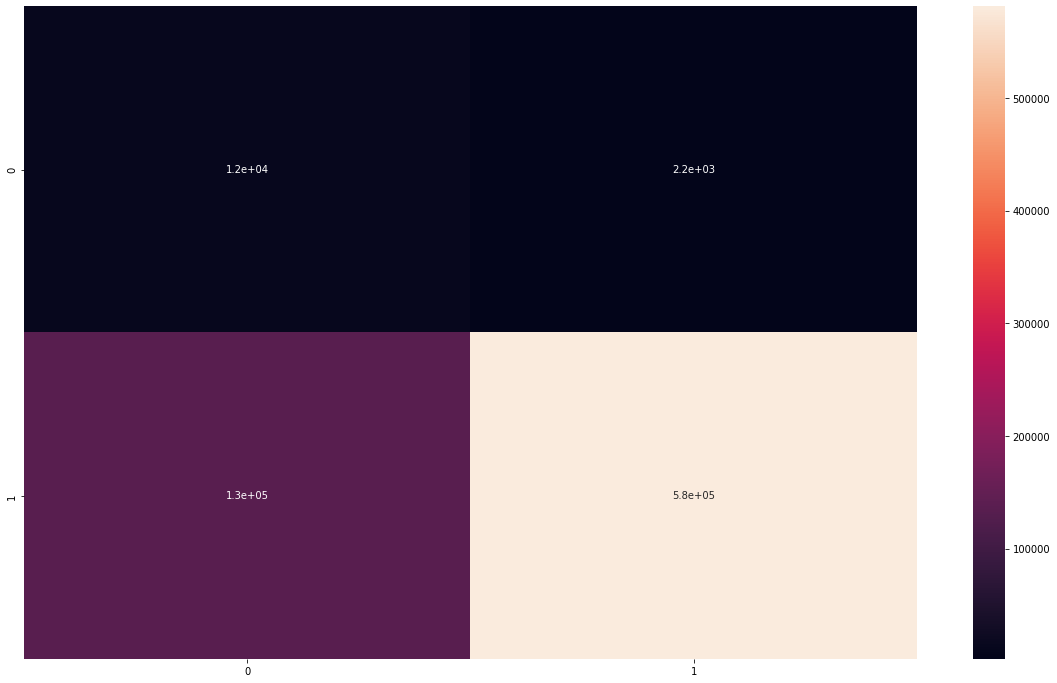

In [ ]:
matrizConfusionEntrenamiento = confusion_matrix(Y_train, predRFEntrenamiento)
tn, fp, fn, tp = matrizConfusionEntrenamiento.ravel()
sensitivity = tp/(fn + tp)
specificity = tn/(tn+fp)
plt.figure(figsize = (20, 12))
sns.heatmap(matrizConfusionEntrenamiento, annot=True)
print("sensibilidad: ", sensitivity, "especificidad: ", specificity)

error de validación

In [ ]:
predRFValidacion= bestRandomForest.predict(X_test)

sensibilidad:  0.8126739934930626 especificidad:  0.8310663764961915


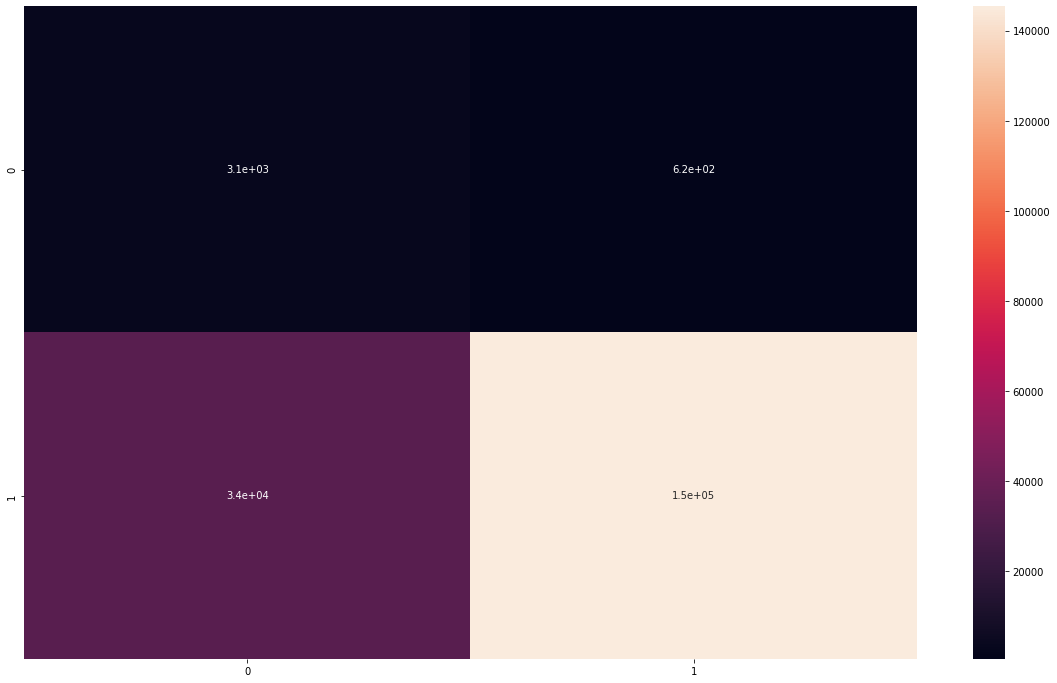

In [ ]:
matrizConfusionValidacion = confusion_matrix(Y_test, predRFValidacion)
tn, fp, fn, tp = matrizConfusionValidacion.ravel()
sensitivity = tp/(fn + tp)
specificity = tn/(tn+fp)
plt.figure(figsize = (20, 12))
sns.heatmap(matrizConfusionValidacion, annot=True)
print("sensibilidad: ", sensitivity, "especificidad: ", specificity)

In [ ]:
bestXGBoost = XGBClassifier(learning_rate=1, max_depth=5, n_estimators=10, random_state=500, class_weight='balanced')
bestXGBoost.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(class_weight='balanced', learning_rate=1, max_depth=5,
              n_estimators=10, random_state=500)

error de entrenamiento

In [ ]:
predRFEntrenamiento = bestXGBoost.predict(X_train)
predRFEntrenamiento

array([1, 1, 1, ..., 1, 1, 1])

sensibilidad:  0.9997023767937737 especificidad:  0.018113207547169812


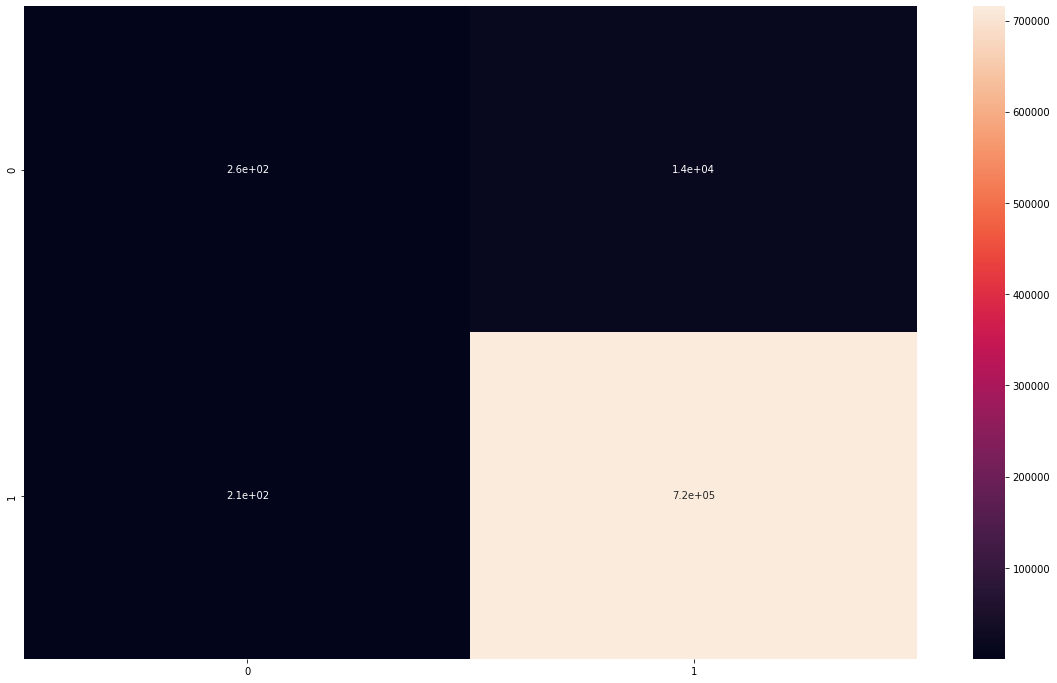

In [ ]:
matrizConfusionEntrenamiento = confusion_matrix(Y_train, predRFEntrenamiento)
tn, fp, fn, tp = matrizConfusionEntrenamiento.ravel()
sensitivity = tp/(fn + tp)
specificity = tn/(tn+fp)
plt.figure(figsize = (20, 12))
sns.heatmap(matrizConfusionEntrenamiento, annot=True)
print("sensibilidad: ", sensitivity, "especificidad: ", specificity)

In [ ]:
predRFValidacion= bestXGBoost.predict(X_test)

sensibilidad:  0.9995919188757085 especificidad:  0.013057671381936888


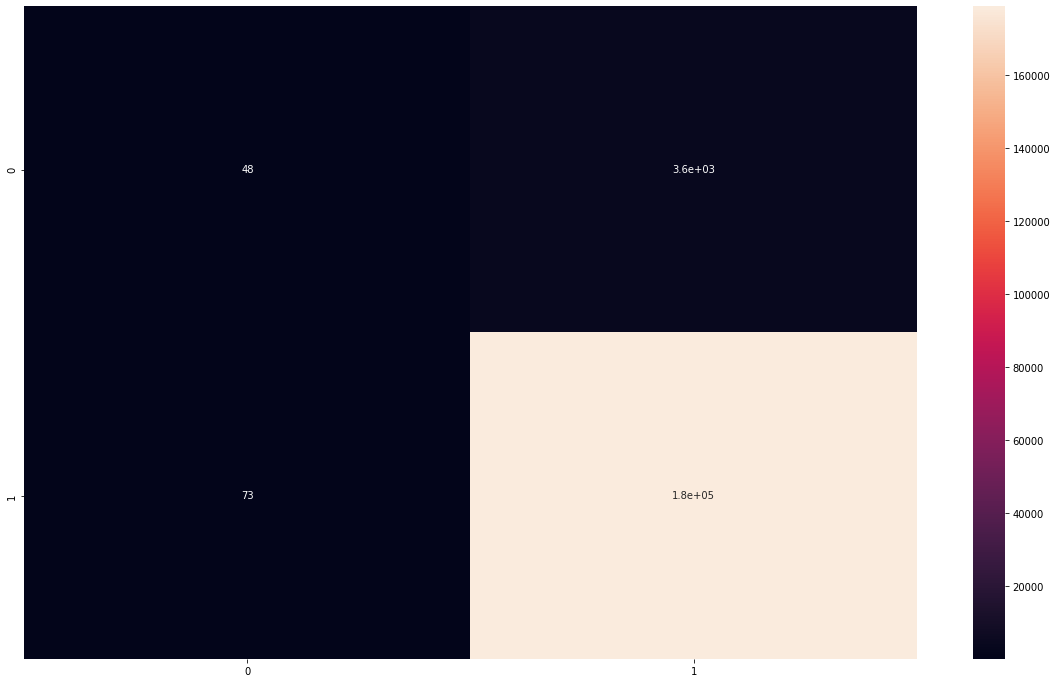

In [ ]:
matrizConfusionValidacion = confusion_matrix(Y_test, predRFValidacion)
tn, fp, fn, tp = matrizConfusionValidacion.ravel()
sensitivity = tp/(fn + tp)
specificity = tn/(tn+fp)
plt.figure(figsize = (20, 12))
sns.heatmap(matrizConfusionValidacion, annot=True)
print("sensibilidad: ", sensitivity, "especificidad: ", specificity)

error de validacion

# conclusiones
- en la práctica se utilizaron dos modelos de ensamblaje, por lo que las predicciones en general fueron buenas, sin embargo, los modelos de ensamblaje son computacionalmente costosos y realizar el tunning utilizando grid search tomó bastante tiempo.
- considerando el verbose del grid search, el modelo que mejor se desempea en terminos de tiempo es el random forest.
- en terminos de especificidad y sensibilidad, el random forest se mantiene por encima del 80% pero sin superar el 85% tanto para el dataset de entrenamiento como para el de validacion  
- el xgboost presenta una sensibilidad del 99% tanto en validación como en entrenamiento, es decir, si el modelo predice que un paciente va a sobrevivir, hay una alta confianza de que sea cierto mientras que tiene una baja especificidad de al rededor del 1%, por lo que el modelo tiene problemas identificanto a los que fallecen.